In [1]:
import lhef
import lorentz

https://github.com/RobertoFranceschini/PyLHEAnalysis

In [2]:
import matplotlib.pyplot as plt

In [3]:
import plotly.plotly as py

In [4]:
from bokeh.plotting import figure, show, output_notebook, output_file, reset_output, save#, push_notebook
output_notebook()

Loading BokehJS ...

In [5]:
import numpy as np
import math
import utils as u
import pandas as pd

In [6]:
import importlib

In [4]:
importlib.reload(lorentz)

<module 'lorentz' from '/Users/roberto/humanroot/utils/PyLHEanalysis/lorentz.py'>

In [5]:
importlib.reload(lhef)

<module 'lhef' from '/Users/roberto/humanroot/utils/PyLHEanalysis/lhef.py'>

In [7]:
def arange(a,b,s):
    return np.arange(a,b+s,s)

In [262]:
LHEfile=lhef.readLHE("pp2zz24l.lhe")

In [269]:
LHEfile=lhef.readLHE("pp2h24l.lhe")

### A first example: collect as you go.

In [223]:
nprinted=0
debug=True
nPrint=11
costheta_values=[] # create a vector where to store the computed values of costheta
abs_costheta_values=[] # and one for the abs
theta_values=[] # and one for the theta angle

for e in LHEfile: # loop on the events
    for p in e.particles: # loop on the particles of each event
        if p.status == 1 and p.id == 11: # check it is a final state and is a e-
            lv=p.fourvector() # make four vector
            obs=lv.cosTheta() # obtain the cosTheta
            costheta_values.append(obs) # append it to the vector of results
            abs_costheta_values.append(math.fabs(obs)) # and the abs(cosTheta)
            theta=lv.theta() # obtain the theta angle
            theta_values.append(theta)
            if nprinted <nPrint: 
                if debug: print(p.px, p.py, p.pz, p.e)
                if debug: print(obs)
                nprinted+=1

38.858955623 -37.367225983 -462.83891416 465.96801228
-0.9932847362048389
-35.723646452 -16.958513843 -10.733605841 40.975363353
-0.2619526701553293
-32.941217098 93.777772398 -307.82776726 323.47693685
-0.9516219927587568
58.872762222 -107.72422834 -93.74550246 154.46271632
-0.6069134655291296
-1.1033913047 -43.152692809 3.6039591766 43.316981553
0.08319968399147325
0.72712992082 -6.3947975413 -154.36413804 154.49825004
-0.9991319513136313
42.966461422 -3.4395947773 -403.03290987 405.33131393
-0.9943295669797563
11.551790177 10.61455348 -210.79436182 211.37732985
-0.9972420503361772
-34.410187304 -41.963730088 22.443487529 58.725852618
0.3821738898396075
30.727980852 24.481089157 -455.95940647 457.64889695
-0.9963083261121011
23.011833608 -169.50504408 261.72667518 312.66972504
0.8370707306189824


https://bokeh.pydata.org/en/latest/docs/gallery.html <br>
https://bokeh.pydata.org/en/latest/docs/gallery/histogram.html

In [236]:
[1,2,3,4][::3]

[1, 4]

In [229]:
[1,2,3,4][1:]

[2, 3, 4]

In [225]:
hist, edges = np.histogram(costheta_values,bins=arange(-1,1,0.2),normed=True)

p1 = figure(title="Electron cosθ Distribution in BG",#tools="save",
            background_fill_color="#E8DDCB")
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.xaxis.axis_label = 'cosθ'
p1.yaxis.axis_label = 'dσ/dcosθ'

show(p1)

https://matplotlib.org/gallery.html
https://matplotlib.org/examples/statistics/histogram_demo_features.html

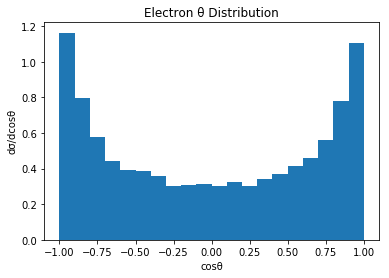

In [129]:
plt.hist(costheta_values,bins=arange(-1,1,0.1),density=True)
plt.title("Electron θ Distribution")
plt.xlabel("cosθ")
plt.ylabel("dσ/dcosθ")
plt.show()

### A second example: collect pairs as you go.

In [247]:
nprinted=0
debug=True
nPrint=12
mass_values=[] # create a vector where to store the computed values of mass

for e in LHEfile: # loop on the events
    fourvectors_container=[] # to store the four-vector of this event
    for p in e.particles: # loop on the particles of each event    
        if p.status == 1 and abs(p.id) == 11: # check it is a final state and is a e- or e+
            lv=p.fourvector() # make four vector
            if nprinted <nPrint:
                if debug: print('[',nprinted,']',p.id, ':,',lv.px, lv.py, lv.pz, lv.e)
                nprinted+=1
            fourvectors_container.append(lv) # add the four-vector to the container
            
    # end of loop on particles in the event
    #nprinted=0
    if len(fourvectors_container) == 4:
        # start analizing the container of four vectors
        _lv01 = fourvectors_container[0]+fourvectors_container[1]
        _mass=_lv01.mass()
        mass_values.append(_mass)
        if nprinted <nPrint:
            if debug: print(_lv01.px, _lv01.py, _lv01.pz, _lv01.e)
            if debug: print(_mass)
            nprinted+=1
# end loop on events

[ 0 ] -11.0 :, 28.1015905 -17.46402858 91.983437402 97.752976626
[ 1 ] 11.0 :, -11.988167515 64.967918098 121.76364218 138.53133616
[ 2 ] -11.0 :, 25.906794415 -42.165888905 -79.107467431 93.311926287
[ 3 ] 11.0 :, -42.0202174 -5.3380006129 -8.5606882649 43.214329851
16.113422985 47.503889517999994 213.74707958200003 236.284312786
87.32811986574855
[ 5 ] -11.0 :, -39.483163412 13.142652584 -116.81739979 124.00788041
[ 6 ] 11.0 :, 4.7469033892 13.152529684 -40.46922704 42.816824568
[ 7 ] -11.0 :, -10.513817983 -16.67577175 -44.514690643 48.684488444
[ 8 ] 11.0 :, 45.250078005 -9.6194105178 -73.588981818 86.922038996
-34.7362600228 26.295182267999998 -157.28662683 166.824704978
34.544968382647994
[ 10 ] -11.0 :, 14.938733749 -19.494493887 15.01526237 28.786440592
[ 11 ] 11.0 :, 49.287103619 40.154482105 269.32021341 276.72184295


In [239]:
_mass

32.43433495962944

https://bokeh.pydata.org/en/latest/docs/gallery.html
https://bokeh.pydata.org/en/latest/docs/gallery/histogram.html

In [245]:
hist, edges = np.histogram(mass_values,bins=arange(-1,120,1),normed=True)

p1 = figure(title="$m_{ee}$ Distribution Background",#tools="save",
            background_fill_color="#E8DDCB")
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.xaxis.axis_label = 'm_(ee)'
p1.yaxis.axis_label = 'dσ/dm_{ee}'

show(p1)

https://matplotlib.org/gallery.html <br>
https://matplotlib.org/examples/statistics/histogram_demo_features.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

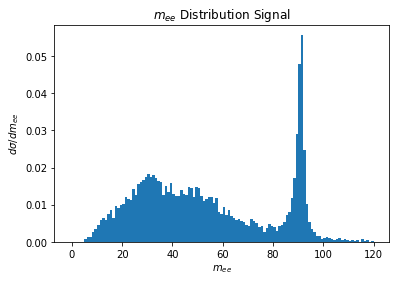

In [248]:
plt.hist(mass_values,bins=arange(-1,120,1),density=True)
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{ee}$")
plt.ylabel("$d\sigma/dm_{ee}$")
plt.show()

***Exercise***

- repeat this plot for all the other possible pairs you can make with 4 electrons
- attempt to make a function that computes the mass of a specified pair $mass(i,j)$ which returns the mass of electron "i" and electron "j", for example mass(2,3) returns the mass of the 2nd and 3rd electron.

### A third example: collect 4-plets as you go.

In [254]:
nprinted=0
debug=True
nPrint=12
mass_values=[] # create a vector where to store the computed values of mass

for e in LHEfile: # loop on the events
    fourvectors_container=[] # to store the four-vector of this event
    for p in e.particles: # loop on the particles of each event    
        if p.status == 1 and abs(p.id) == 11: # check it is a final state and is a e-
            lv=p.fourvector() # make four vector
            if nprinted <nPrint:
                if debug: print('[',nprinted,']',p.id, ':,',lv.px, lv.py, lv.pz, lv.e)
                nprinted+=1
            fourvectors_container.append(lv) # add the four-vector to the container
            
    # end of loop on particles in the event
    #nprinted=0
    if len(fourvectors_container) == 4:
        # start analizing the container of four vectors
        _lv01 = fourvectors_container[0]+fourvectors_container[1]+fourvectors_container[2]+fourvectors_container[3]
        _mass=_lv01.mass()
        mass_values.append(_mass)
        if nprinted <nPrint:
            if debug: print(_lv01.px, _lv01.py, _lv01.pz, _lv01.e)
            if debug: print(_mass)
            nprinted+=1
# end loop on events

[ 0 ] -11.0 :, 28.1015905 -17.46402858 91.983437402 97.752976626
[ 1 ] 11.0 :, -11.988167515 64.967918098 121.76364218 138.53133616
[ 2 ] -11.0 :, 25.906794415 -42.165888905 -79.107467431 93.311926287
[ 3 ] 11.0 :, -42.0202174 -5.3380006129 -8.5606882649 43.214329851
0.0 9.99911264898401e-11 126.07892388610003 372.810568924
350.8444459488557
[ 5 ] -11.0 :, -39.483163412 13.142652584 -116.81739979 124.00788041
[ 6 ] 11.0 :, 4.7469033892 13.152529684 -40.46922704 42.816824568
[ 7 ] -11.0 :, -10.513817983 -16.67577175 -44.514690643 48.684488444
[ 8 ] 11.0 :, 45.250078005 -9.6194105178 -73.588981818 86.922038996
-8.000071716196544e-10 1.999982401912348e-10 -275.39029929099996 302.43123241800004
124.99933359135889
[ 10 ] -11.0 :, 14.938733749 -19.494493887 15.01526237 28.786440592
[ 11 ] 11.0 :, 49.287103619 40.154482105 269.32021341 276.72184295


https://bokeh.pydata.org/en/latest/docs/gallery.html
https://bokeh.pydata.org/en/latest/docs/gallery/histogram.html

In [252]:
hist, edges = np.histogram(mass_values,bins=arange(-1,1000,2),normed=True)

p1 = figure(title="$m_{eeee}$ Distribution Background",#tools="save",
            background_fill_color="#E8DDCB")
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.xaxis.axis_label = 'm_(ee)'
p1.yaxis.axis_label = 'dσ/dm_{ee}'

show(p1)

https://matplotlib.org/gallery.html
https://matplotlib.org/examples/statistics/histogram_demo_features.html

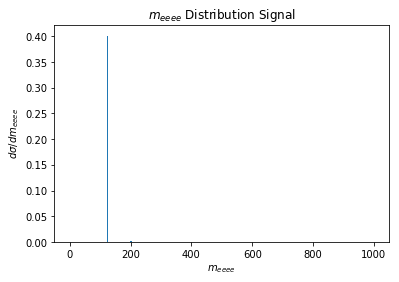

In [255]:
plt.hist(mass_values,bins=arange(-1,1000,1),density=True)
plt.title("$m_{eeee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

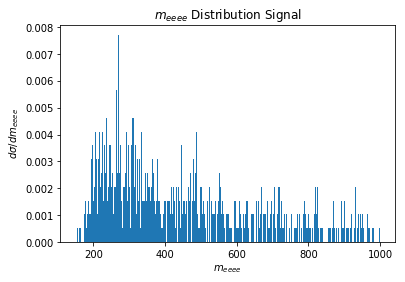

In [257]:
plt.hist(mass_values,bins=arange(150,1000,1),density=True)
plt.title("$m_{eeee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

## A 4th example: collect 4-plets as you go (and keep them for later).

In [276]:
nprinted=0
debug=True
nPrint=12
mass_values=[] # create a vector where to store the computed values of mass

for e in LHEfile: # loop on the events
    fourvectors_container=[] # to store the four-vector of this event
    for p in e.particles: # loop on the particles of each event    
        if p.status == 1 and abs(p.id) == 11: # check it is a final state and is a e-
            lv=p.fourvector() # make four vector
            if nprinted <nPrint:
                if debug: print('[',nprinted,']',p.id, ':,',lv.px, lv.py, lv.pz, lv.e)
                nprinted+=1
            fourvectors_container.append(lv) # add the four-vector to the container
            
    # end of loop on particles in the event
    #nprinted=0
    if len(fourvectors_container) == 4:
        # start analizing the container of four vectors
        _lv01 = fourvectors_container[0]+fourvectors_container[1]+fourvectors_container[2]+fourvectors_container[3]
        _mass=_lv01.mass()
        mass_values.append(_mass)
        if nprinted <nPrint:
            if debug: print(_lv01.px, _lv01.py, _lv01.pz, _lv01.e)
            if debug: print(_mass)
            nprinted+=1
# end loop on events

[ 0 ] -11.0 :, 17.200758201 -61.152970654 57.073778577 85.398876477
[ 1 ] 11.0 :, 50.994538497 89.26002324 10.678303015 103.35289479
[ 2 ] -11.0 :, -50.239992521 -47.948540295 -3.5144940941 69.537551249
[ 3 ] 11.0 :, -17.955304177 19.841487709 -53.482747771 59.803694633
-3.552713678800501e-15 -7.105427357601002e-15 10.754839726899995 318.093017149
317.91115265338317
[ 5 ] -11.0 :, 33.794473861 -58.977471967 -39.942072692 78.840204427
[ 6 ] 11.0 :, 42.216129954 54.047048477 38.364366456 78.581866171
[ 7 ] -11.0 :, -43.0780917 -18.776030023 66.207768949 81.189469497
[ 8 ] 11.0 :, -32.932512115 23.706453513 20.374140766 45.405417126
-7.105427357601002e-15 -3.552713678800501e-15 85.004203479 284.016957221
270.99800253872
[ 10 ] -11.0 :, -22.386986716 -14.874210324 -29.35072838 39.798047232
[ 11 ] 11.0 :, 33.121116873 51.229480761 22.597424689 65.054682265


Keep the result and store it in a separate array for later plot

In [264]:
backgroud_mass=mass_values

run again for the signal and now keep the result and store it in a separate array for later plot.

In [271]:
signal_mass=mass_values

https://matplotlib.org/gallery.html
https://matplotlib.org/examples/statistics/histogram_demo_features.html

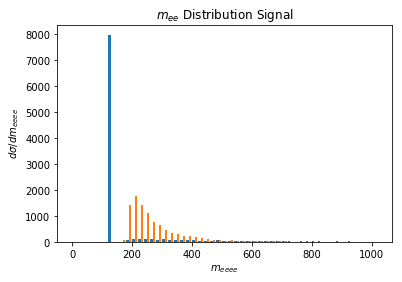

In [272]:
plt.hist([signal_mass,backgroud_mass],bins=arange(-1,1000,20),density=False)
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

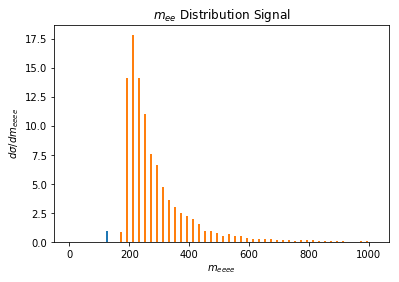

In [186]:
plt.hist([signal_mass,backgroud_mass],bins=arange(-1,1000,20),density=False,weights=[1.15E-4*np.ones_like(signal_mass),1e-2*np.ones_like(backgroud_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

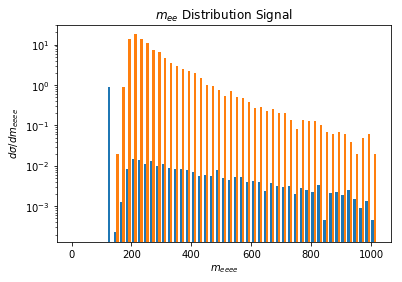

In [273]:
plt.hist([signal_mass,backgroud_mass],bins=arange(-1,1000,20),log=True,density=False,weights=[1.15E-4*np.ones_like(signal_mass),1e-2*np.ones_like(backgroud_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

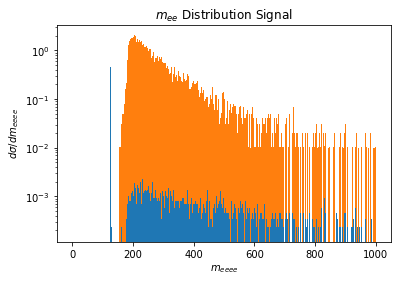

In [274]:
plt.hist([signal_mass,backgroud_mass],bins=arange(-1,1000,2),log=True,stacked=True,density=False,weights=[1.15E-4*np.ones_like(signal_mass),1e-2*np.ones_like(backgroud_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

In [275]:
LHEfile=lhef.readLHE("pp24l_nohiggs.lhe")

In [277]:
fullbackground_mass=mass_values

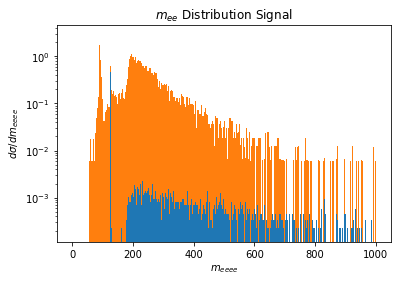

In [278]:
plt.hist([signal_mass,fullbackground_mass],bins=arange(-1,1000,2),log=True,stacked=True,density=False,weights=[1.15E-4*np.ones_like(signal_mass),6e-3*np.ones_like(backgroud_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

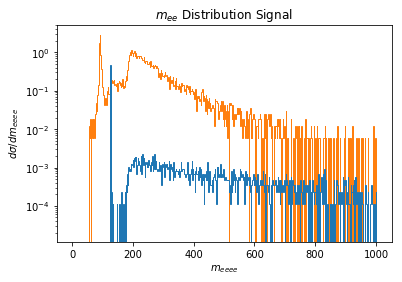

In [279]:
plt.hist([signal_mass,fullbackground_mass],bins=arange(-1,1000,2),log=True,histtype='step',density=False,weights=[1.15E-4*np.ones_like(signal_mass),6e-3*np.ones_like(fullbackground_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

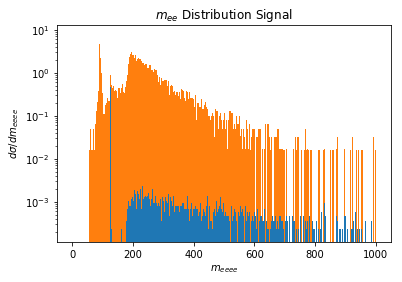

In [201]:
plt.hist([signal_mass,fullbackground_mass],bins=arange(-1,1000,2),log=True,histtype='barstacked',density=False,weights=[1.15E-4*np.ones_like(signal_mass),16e-3*np.ones_like(fullbackground_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

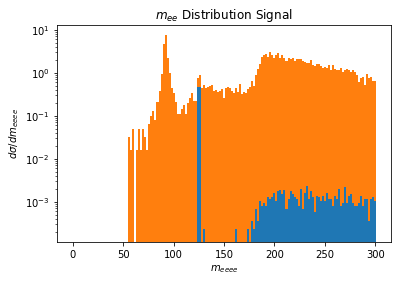

In [282]:
plt.hist([signal_mass,fullbackground_mass],bins=arange(-1,300,2),log=True,histtype='barstacked',density=False,weights=[1.15E-4*np.ones_like(signal_mass),16e-3*np.ones_like(fullbackground_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

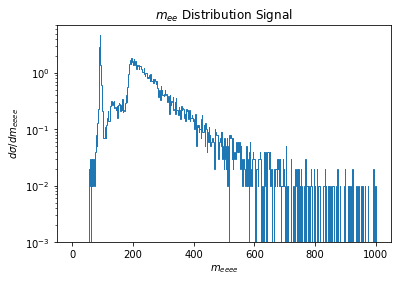

In [307]:
n, bins, patches = plt.hist([fullbackground_mass],bins=arange(-1,1000,2),log=True,histtype='step',density=False,weights=[1.0E-2*np.ones_like(fullbackground_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

In [304]:
print(bins[60:66],'--->',n[60:66])

[119 121 123 125 127 129] ---> [0.14 0.14 0.19 0.26 0.27 0.32]


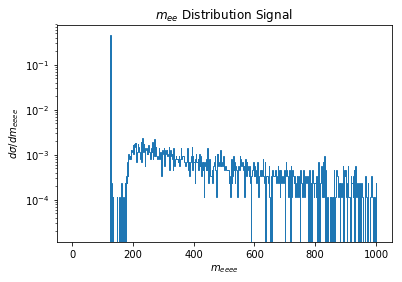

In [300]:
n, bins, patches = plt.hist([signal_mass],bins=arange(-1,1000,2),log=True,histtype='step',density=False,weights=[1.15E-4*np.ones_like(signal_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

In [302]:
print(bins[60:66],'--->',n[60:66])

[119 121 123 125 127 129] ---> [0.00000e+00 0.00000e+00 4.56320e-01 4.59195e-01 0.00000e+00 2.30000e-04]


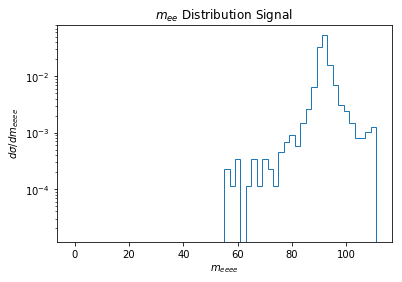

In [281]:
plt.hist([fullbackground_mass],bins=arange(-1,110,2),log=True,histtype='step',density=False,weights=[1.15E-4*np.ones_like(fullbackground_mass)])
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{eeee}$")
plt.ylabel("$d\sigma/dm_{eeee}$")
plt.show()

### A second example: collect pairs as you go.

In [203]:
nprinted=0
debug=True
nPrint=12
mass_values=[] # create a vector where to store the computed values of mass

for e in LHEfile: # loop on the events
    fourvectors_container=[] # to store the four-vector of this event
    for p in e.particles: # loop on the particles of each event    
        if p.status == 1 and abs(p.id) == 11: # check it is a final state and is a e-
            lv=p.fourvector() # make four vector
            if nprinted <nPrint:
                if debug: print('[',nprinted,']',p.id, ':,',lv.px, lv.py, lv.pz, lv.e)
                nprinted+=1
            fourvectors_container.append(lv) # add the four-vector to the container
            
    # end of loop on particles in the event
    #nprinted=0
    if len(fourvectors_container) == 4:
        # start analizing the container of four vectors
        _lv01 = fourvectors_container[0]+fourvectors_container[1]
        _mass=_lv01.mass()
        mass_values.append(_mass)
        if nprinted <nPrint:
            if debug: print(_lv01.px, _lv01.py, _lv01.pz, _lv01.e)
            if debug: print(_mass)
            nprinted+=1
# end loop on events

[ 0 ] -11.0 :, 17.200758201 -61.152970654 57.073778577 85.398876477
[ 1 ] 11.0 :, 50.994538497 89.26002324 10.678303015 103.35289479
[ 2 ] -11.0 :, -50.239992521 -47.948540295 -3.5144940941 69.537551249
[ 3 ] 11.0 :, -17.955304177 19.841487709 -53.482747771 59.803694633
68.19529669799999 28.107052585999995 67.752081592 188.75177126699998
159.98837988922958
[ 5 ] -11.0 :, 33.794473861 -58.977471967 -39.942072692 78.840204427
[ 6 ] 11.0 :, 42.216129954 54.047048477 38.364366456 78.581866171
[ 7 ] -11.0 :, -43.0780917 -18.776030023 66.207768949 81.189469497
[ 8 ] 11.0 :, -32.932512115 23.706453513 20.374140766 45.405417126
76.010603815 -4.930423490000003 -1.5777062360000045 157.422070598
137.75811477471282
[ 10 ] -11.0 :, -22.386986716 -14.874210324 -29.35072838 39.798047232
[ 11 ] 11.0 :, 33.121116873 51.229480761 22.597424689 65.054682265


https://bokeh.pydata.org/en/latest/docs/gallery.html
https://bokeh.pydata.org/en/latest/docs/gallery/histogram.html

In [204]:
hist, edges = np.histogram(mass_values,bins=arange(-1,120,1),normed=True)

p1 = figure(title="$m_{ee}$ Distribution Background",#tools="save",
            background_fill_color="#E8DDCB")
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.xaxis.axis_label = 'm_(ee)'
p1.yaxis.axis_label = 'dσ/dm_{ee}'

show(p1)

https://matplotlib.org/gallery.html
https://matplotlib.org/examples/statistics/histogram_demo_features.html

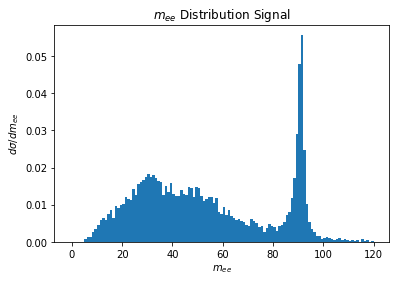

In [136]:
plt.hist(mass_values,bins=arange(-1,120,1),density=True)
plt.title("$m_{ee}$ Distribution Signal")
plt.xlabel("$m_{ee}$")
plt.ylabel("$d\sigma/dm_{ee}$")
plt.show()